# 🧪 Parcial – Métodos Predictivos
Completa las celdas con `TODO` y ejecuta `Runtime → Run all` antes de entregar.

## 🎯 Instrucciones Generales
- Este parcial está dividido en dos partes: teoría (40 pts) y práctica (60 pts).
- Documenta claramente tu código y explica tus respuestas en celdas Markdown.
- Al finalizar, exporta el notebook a PDF y entrega también tus 5 slides con visualizaciones clave.


## <a id='parte-a'></a>📝 Parte A — Cuestionario Teórico (40 pts)
Responde **brevemente** en las celdas Markdown que siguen a cada pregunta.


#### 1️⃣ **Variable objetivo (y)** – Defínela y da un ejemplo en este dataset.

*Respuesta:* <!-- TODO --> La variable objetivo (y) es la que se quiere predecir en un modelo. En un dataset de clientes, por ejemplo, la variable objetivo puede ser si realizan o no una compra.




#### 2️⃣ Ordena las fases del *pipeline* de ML: `Modelado`, `Pre‑procesamiento`, `EDA`, `Evaluación`, `Insight de negocio`.

*Respuesta:* <!-- TODO -->  Insight de negocio → EDA → Pre-procesamiento → Modelado → Evaluación

Este orden permite primero entender el problema desde el negocio, explorar los datos, prepararlos, construir el modelo, evaluarlo y tomar desiciones.


#### 3️⃣ Para un problema de **clases desbalanceadas**, ¿qué métrica priorizarías y por qué?

*Respuesta:* <!-- TODO --> Priorizaría el F1-score porque equilibra precisión y recall, lo cual es vital cuando las clases no están distribuidas equitativamente. La exactitud (accuracy) puede ser engañosa si la clase minoritaria es la más importante.



#### 4️⃣ Describe **overfitting** y cómo lo detectarías en la práctica.

*Respuesta:* <!-- TODO --> El overfitting es cuando un modelo aprende tanto los patrones como el ruido del conjunto de entrenamiento, lo que lo hace ineficiente al generalizar. Se detecta comparando el rendimiento, si el modelo tiene alta precisión en entrenamiento pero bajo desempeño en validación o test, probablemente hay sobreajuste.




#### 5️⃣ Completa: *K‑means es un algoritmo de _________ porque ________.*

*Respuesta:* <!-- TODO --> K-means es un algoritmo de clustering no supervisado porque agrupa los datos en k clústeres sin requerir etiquetas, basándose en la similitud.




#### 7️⃣ En **regresión**, ¿cómo es la variable objetivo? (cualitativa, cuantitativa, binaria…).

*Respuesta:* <!-- TODO --> Es cuantitativa ya que la regresión busca predecir valores numéricos como el precio de una casa o el ingreso mensual.




#### 8️⃣ Menciona 2 técnicas comunes de **pre‑procesamiento de texto**.

*Respuesta:* <!-- TODO -->
1. Normalización: Convertir el texto a un formato estándar, por ejemplo poner todo en minúsculas o eliminar signos de puntuación.
2. Eliminación de palabras vacías: Eliminar palabras comunes que no aportan mucho significado al análisis, por ejemplo "el" o "la".


#### 9️⃣ ¿Qué representa el parámetro *k* en K‑means y qué ocurre si es muy grande?

*Respuesta:* <!-- TODO --> K representa el número de clústeres que se quiere formar. Si se elige un valor muy grande, los clústeres pueden volverse demasiado pequeños, representando ruido o subdivisiones irrelevantes, lo cual puede perjudicar la interpretación y generalización del modelo.




#### 🔟 Define brevemente un **embedding** en NLP y su utilidad.

*Respuesta:* <!-- TODO --> Un embedding es una representación numérica densa de palabras en un espacio vectorial. A diferencia del one-hot encoding, los embeddings capturan relaciones semánticas como por ejemplo "rey" y "reina" están cerca en el espacio. Son fundamentales en NLP porque permiten que los modelos comprendan mejor el significado contextual del lenguaje.



In [1]:
!wget https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/amazon.csv.zip

--2025-06-05 01:43:01--  https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/amazon.csv.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/amazon.csv.zip [following]
--2025-06-05 01:43:01--  https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/amazon.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2043633 (1.9M) [application/zip]
Saving to: ‘amazon.csv.zip’

amazon.csv.zip      100%[===================>]   1.95M  --.-KB/s    in 0.07s   

In [2]:
!unzip amazon.csv.zip

Archive:  amazon.csv.zip
  inflating: amazon.csv              


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings, random
warnings.filterwarnings('ignore')
random.seed(42)
np.random.seed(42)

### 2. Carga de datos

In [4]:
# Reemplaza con la ruta correcta de tu archivo CSV si lo subes a Colab
df = pd.read_csv('amazon.csv')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


### 3. Limpieza y Feature Engineering


*   Tome `review_content` para crear una columna text

*   Haga una limpieza de rating:
```
df['col'] = df['col'].str.replace(',', '.').str.strip()
df['col'] = df['col'].str.replace('|', '0').str.strip()
df['col'] = df['col'].astype(float)
```
*   Haga una limpieza de `discounted_price`


```
  df['col'] = df['col'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
  df['col'] = df['col'].replace('₹', '', regex=True).astype(float)
```



*   Haga una limpieza de `actual_price`

```
df['col'] = df['col'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
df['col'] = df['col'].replace('₹', '', regex=True)
df['col'] = df['col'].astype(float)
```


*   Cree la variable `positive` donde `ranting` se mayor a 4:
```
df['col1'] = df['col2'].apply(lambda x: 1 if x >= 4 else 0)
```

*   Con `discount_percentage` donde `ranting` se mayor a 4:
```
df['col'] = df['col'].replace('%', '', regex=True).astype(float)
```

In [5]:
df['text'] = df['review_content']

In [6]:
df['rating'] = df['rating'].str.replace(',', '.').str.strip()
df['rating'] = df['rating'].str.replace('|', '0').str.strip()
df['rating'] = df['rating'].astype(float)
df['rating']

,rating
0,4.2
1,4.0
2,3.9
3,4.2
4,4.2
...,...
1460,4.0
1461,4.1
1462,3.6
1463,4.0


In [7]:
df['discounted_price'] = df['discounted_price'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
df['discounted_price'] = df['discounted_price'].replace('₹', '', regex=True).astype(float)
df['discounted_price']

,discounted_price
0,399.000
1,199.000
2,199.000
3,329.000
4,154.000
...,...
1460,379.000
1461,2.280
1462,2.219
1463,1.399


In [9]:
df['actual_price'] = df['actual_price'].astype(str)
df['actual_price'] = df['actual_price'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
df['actual_price'] = df['actual_price'].replace('₹', '', regex=True)
df['actual_price'] = df['actual_price'].astype(float)
df['actual_price']

,actual_price
0,1099.0
1,349.0
2,1899.0
3,699.0
4,399.0
...,...
1460,919.0
1461,3045.0
1462,3080.0
1463,1890.0


In [10]:
df['positive'] = df['rating'].apply(lambda x: 1 if x >= 4 else 0)
df['positive']

,positive
0,1
1,1
2,0
3,1
4,1
...,...
1460,1
1461,1
1462,0
1463,1


In [11]:
df['discount_percentage'] = df['discount_percentage'].replace('%', '', regex=True).astype(float)
df['discount_percentage']

,discount_percentage
0,64.0
1,43.0
2,90.0
3,53.0
4,61.0
...,...
1460,59.0
1461,25.0
1462,28.0
1463,26.0


## 💻 Parte B – Práctica (60 pts)
### 1. Setup


## Realize dos WorldClouds uno con reviews positivos y otro con negativos y haga un grafico de barras comaparado por los 10 mas comunes.

In [12]:
from wordcloud import WordCloud

In [13]:
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'[^\w\s]', '', texto)
    palabras = texto.split()
    palabras = [palabra for palabra in palabras if palabra not in stop_words]
    return palabras

In [22]:
def contar_palabras(texto):
    palabras = limpiar_texto(texto)
    return Counter(palabras)

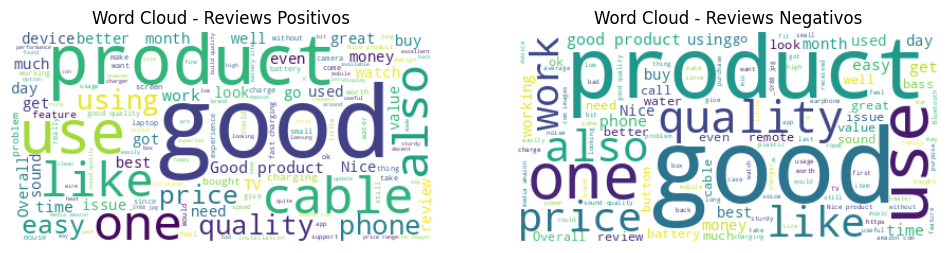

In [23]:
positive_reviews = df[df['positive'] == 1]['text'].str.cat(sep=' ')
negative_reviews = df[df['positive'] == 0]['text'].str.cat(sep=' ')

wordcloud_positive = WordCloud(stopwords=stop_words, background_color='white').generate(positive_reviews)
wordcloud_negative = WordCloud(stopwords=stop_words, background_color='white').generate(negative_reviews)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear', cmap="YlGn")
plt.axis("off")
plt.title('Word Cloud - Reviews Positivos')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear', cmap="Reds")
plt.axis("off")
plt.title('Word Cloud - Reviews Negativos')
plt.show()

In [24]:
positive_word_counts = contar_palabras(positive_reviews)
negative_word_counts = contar_palabras(negative_reviews)
top_10_positive = positive_word_counts.most_common(10)
top_10_negative = negative_word_counts.most_common(10)

In [25]:
words_positive = [word for word, count in top_10_positive]
counts_positive = [count for word, count in top_10_positive]

words_negative = [word for word, count in top_10_negative]
counts_negative = [count for word, count in top_10_negative]

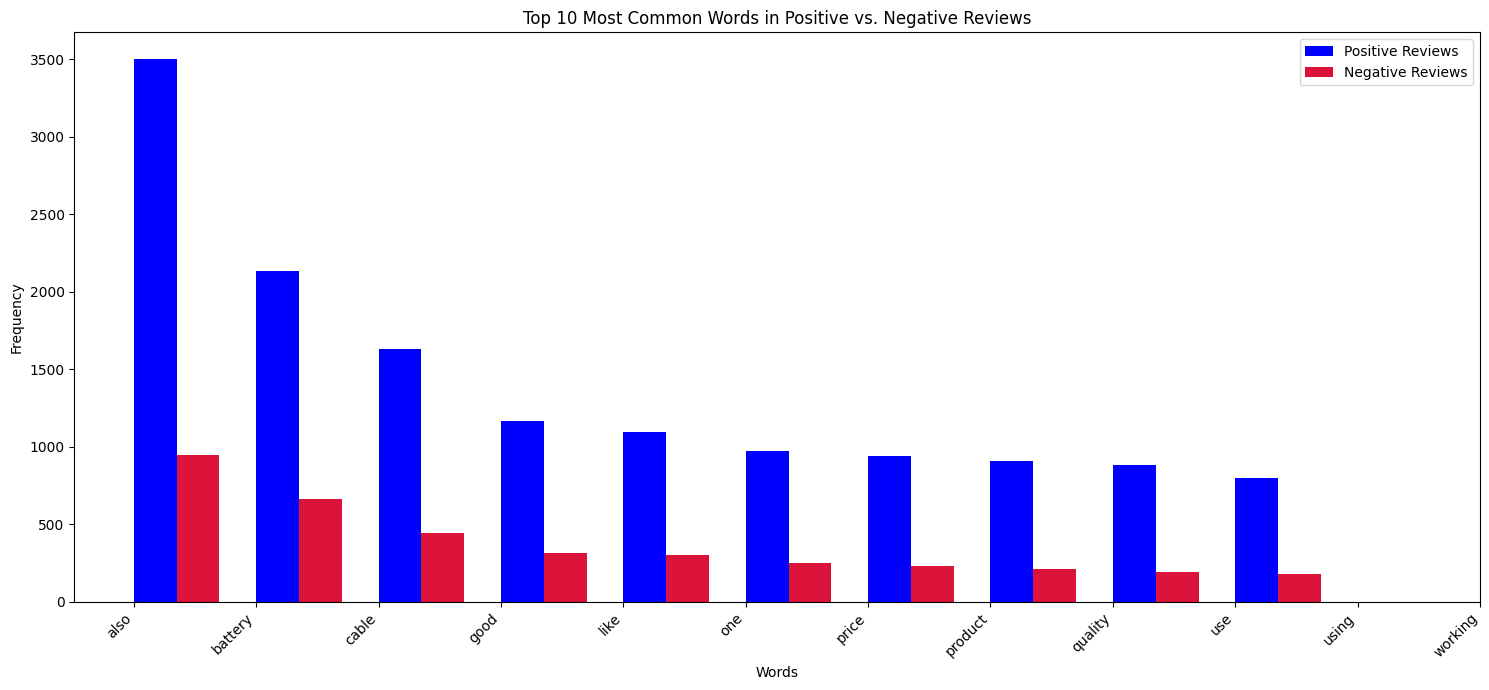

In [26]:
fig, ax = plt.subplots(figsize=(15, 7))

bar_width = 0.35
index = np.arange(10)

bar1 = ax.bar(index, counts_positive, bar_width, label='Positive Reviews', color='blue')
bar2 = ax.bar(index + bar_width, counts_negative, bar_width, label='Negative Reviews', color='crimson')

ax.set_xlabel('Words')
ax.set_ylabel('Frequency')
ax.set_title('Top 10 Most Common Words in Positive vs. Negative Reviews')

# Combine and sort unique words for x-axis labels
all_words = sorted(list(set(words_positive + words_negative)))

# Set the number of x-ticks to match the number of unique words
ax.set_xticks(np.arange(len(all_words)) - bar_width/2) # Adjust tick positions to center bars

# Set the tick labels
ax.set_xticklabels(all_words, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

### 4. Análisis Exploratorio de Datos (EDA)

In [27]:
print("First 5 rows of the DataFrame:")
display(df.head())

First 5 rows of the DataFrame:


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,text,positive
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Looks durable Charging is fine tooNo complains...,1
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,I ordered this cable to connect my phone to An...,1
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,"Not quite durable and sturdy,https://m.media-a...",0
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,"Good product,long wire,Charges good,Nice,I bou...",1
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,"Bought this instead of original apple, does th...",1


In [28]:
print("\nDataFrame Info:")
df.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   object 
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         

In [29]:
print("\nDescriptive Statistics:")
display(df.describe())


Descriptive Statistics:


,discounted_price,actual_price,discount_percentage,rating,positive
count,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000
mean,461.755939,5827.899659,47.691468,4.093788,0.757679
std,3758.381683,15755.694899,21.635905,0.310598,0.428634
min,1.043000,39.000000,0.000000,0.000000,0.000000
25%,2.999000,825.000000,32.000000,4.000000,1.000000
50%,154.000000,1690.000000,50.000000,4.100000,1.000000
75%,399.000000,4400.000000,63.000000,4.300000,1.000000
max,99806.000000,433296.000000,94.000000,5.000000,1.000000


In [30]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
text                   0
positive               0
dtype: int64


### 5. Clasificación Supervisada – Regresión Logística (25 pts)


*   Haga una regresion logistica de postive vs text
*   Muestre los resultados en una matriz de confusion



In [31]:
def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'[^\w\s]', '', texto)
    palabras = texto.split()
    palabras = [palabra for palabra in palabras if palabra not in stop_words]
    return palabras

In [32]:
def contar_palabras(texto):
    palabras = limpiar_texto(texto)
    return Counter(palabras)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['positive'], test_size=0.2, random_state=42)
model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('logistic', LogisticRegression())
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [36]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 10,  64],
       [  0, 219]])

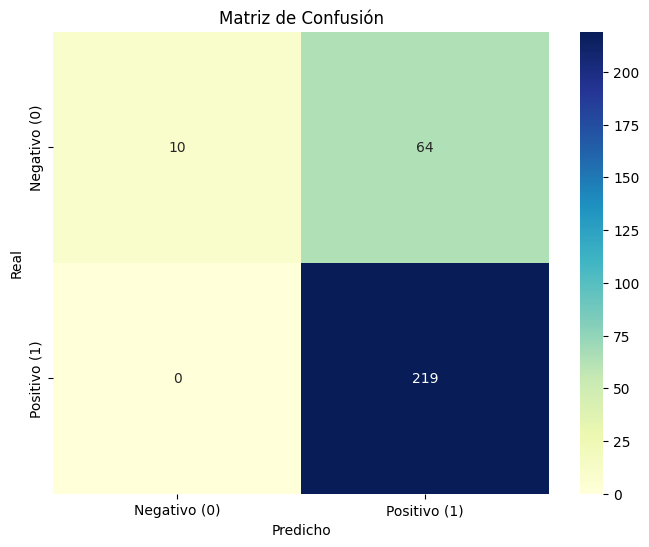

In [37]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Negativo (0)', 'Positivo (1)'], yticklabels=['Negativo (0)', 'Positivo (1)'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


### 6. Agrupamiento K-Means – No Supervisado (20 pts)


*   Cree una variable cluster usando un modelo de clustering

*   Como podria nombrar los clusters usando las otras variables



In [38]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text'])
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X)

print(df[['text', 'cluster']].head())

                                                text  cluster
0  Looks durable Charging is fine tooNo complains...        2
1  I ordered this cable to connect my phone to An...        2
2  Not quite durable and sturdy,https://m.media-a...        4
3  Good product,long wire,Charges good,Nice,I bou...        2
4  Bought this instead of original apple, does th...        2


In [39]:
df['cluster'].value_counts()

,count
cluster,
3,746
1,280
2,226
4,145
0,68


In [40]:
print("\n--- Perfil de Clusters ---")

# Iterar sobre cada cluster para analizar su perfil
for cluster_id in sorted(df['cluster'].unique()):
    print(f"\n--- Cluster {cluster_id} ---")

    # Filtrar el DataFrame para el cluster actual
    cluster_df = df[df['cluster'] == cluster_id]
    num_reviews = len(cluster_df)

    print(f"Total de reseñas en este cluster: {num_reviews}")

    # Análisis de la variable 'positive' (sentimiento binario)
    print("\nDistribución de Sentimiento (Positivo/Negativo):")
    print(cluster_df['positive'].value_counts(normalize=True)) # Mostrar porcentajes

    # Análisis de las variables numéricas (rating, discounted_price, actual_price, discount_percentage)
    print("\nEstadísticas descriptivas de variables numéricas:")
    print(cluster_df[['rating', 'discounted_price', 'actual_price', 'discount_percentage']].describe())

    # Análisis de las palabras más frecuentes en el texto del cluster
    # Puedes tomar una muestra si el cluster es muy grande
    sample_text = ' '.join(cluster_df['text'].sample(min(1000, num_reviews), replace=True).tolist())

    # Correctly indent the import and subsequent code block
    from collections import Counter
    import re

    # Using the previously defined clean_text function
    words = limpiar_texto(sample_text)

    word_counts = Counter(words)
    print("\nPalabras más frecuentes (Top 10):")
    print(word_counts.most_common(10))

    print("-" * (len(f"--- Cluster {cluster_id} ---"))) # Separador para el siguiente cluster


--- Perfil de Clusters ---

--- Cluster 0 ---
Total de reseñas en este cluster: 68

Distribución de Sentimiento (Positivo/Negativo):
positive
1    0.75
0    0.25
Name: proportion, dtype: float64

Estadísticas descriptivas de variables numéricas:
          rating  discounted_price  actual_price  discount_percentage
count  68.000000         68.000000     68.000000            68.000000
mean    4.060294          9.965132   8974.558824            69.911765
std     0.239489         43.370075   5078.069378            13.656484
min     3.300000          1.299000    999.000000            25.000000
25%     3.975000          1.799000   5999.000000            60.000000
50%     4.100000          1.999000   7990.000000            75.000000
75%     4.200000          2.998250   9999.000000            78.250000
max     4.500000        265.000000  29999.000000            91.000000

Palabras más frecuentes (Top 10):
[('watch', 650), ('good', 384), ('features', 149), ('product', 134), ('also', 130), ('ba

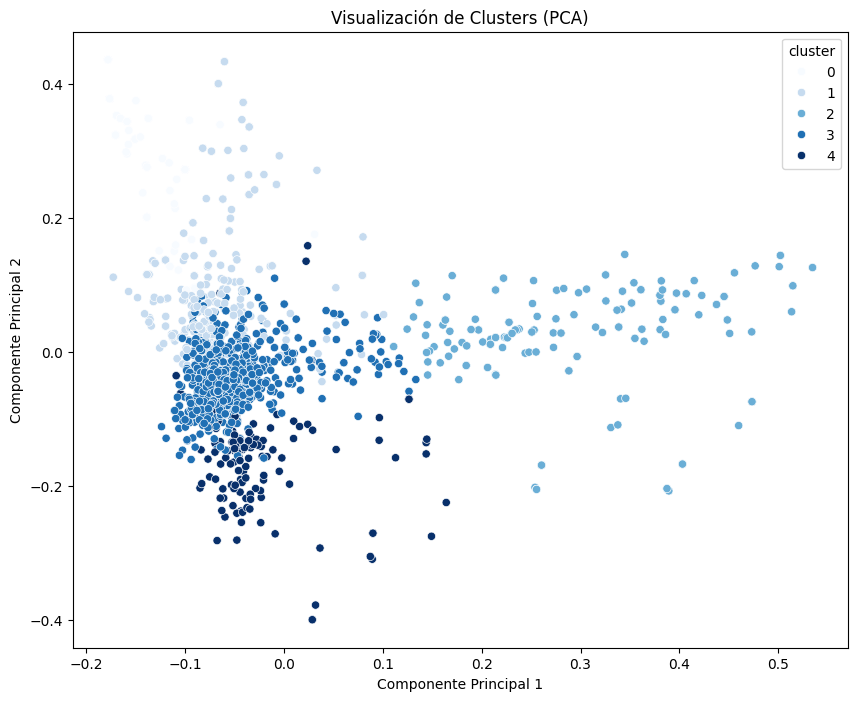

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X.toarray())

df['pca_x'] = X_pca[:, 0]
df['pca_y'] = X_pca[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='pca_x', y='pca_y', hue='cluster', data=df, palette='Blues', legend='full')
plt.title('Visualización de Clusters (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

### 7. Insight & Recomendaciones (15 pts)
Escribe tu análisis aquí:

TODO: Relaciona errores del modelo con los clusters y propone acciones de negocio.

## Análisis de Resultados y Recomendaciones de Negocio

Luego de entrenar el modelo de clasificación y evaluarlo con la matriz de confusión se puede decir que su desempeño es bastante bueno para identificar reseñas positivas, pero tiene dificultades al clasificar correctamente las reseñas negativas. La matriz mostró que de 229 reseñas que eran realmente positivas, el modelo clasificó correctamente 219 (verdaderos positivos) y no cometió errores en este sentido (0 falsos negativos). Sin embargo, de las 74 reseñas realmente negativas, solo 10 fueron clasificadas correctamente (verdaderos negativos), mientras que 64 fueron clasificadas erróneamente como positivas (falsos positivos). Esto significa que el modelo tiene tendencia a predecir positivo, lo cual puede ser riesgoso desde el punto de vista del negocio ya que podría pasar por alto señales de insatisfacción de los usuarios afectando la toma de decisiones.

Para entender mejor los errores del modelo, especialmente los falsos positivos, es importante analizar en qué clusters se concentran. Los falsos positivos son reseñas que el modelo clasificó como positivas, pero en realidad eran negativas. Estos errores tienden a aparecer en clusters donde hay una proporción considerable de reseñas negativas o donde las palabras clave pueden inducir al modelo a una interpretación equivocada. Por ejemplo, en el Cluster 1, aunque predominan los términos positivos como good, quality y price, también es el grupo con mayor proporción de reseñas negativas. Esto quiere decir que las reseñas en este cluster podrían estar usando un lenguaje confuso que complica el análisis para el modelo.

De manera similar, los Clusters 0, 3 y 4 también presentan este tipo de problema. Aunque sus proporciones de reseñas positivas son altas, las palabras clave presentes pueden aparecer tanto en contextos positivos como negativos. Por ejemplo, una reseña podría decir "el producto tiene buen diseño, pero no funciona bien", lo que puede hacer que el modelo se enfoque más en los aspectos positivos y no capture correctamente el tono negativo. En cambio, el Cluster 2, que está muy enfocado en cables de carga y tiene una mayoría clara de reseñas positivas, es menos probable que contribuya a los errores. En general, los falsos positivos se originan en clusters donde el lenguaje no es completamente claro, lo que pone en evidencia las limitaciones del modelo actual al interpretar reseñas más complejas.

Se recomienda realizar un análisis más detallado de estas reseñas para detectar patrones como sarcasmo o lenguaje confuso para de esta forma entender las limitaciones del modelo actual. Además, se recomienda mejorar el modelo de sentimiento utilizando técnicas más avanzadas que permitan captar mejor el contexto y matices del lenguaje. También es importante poner atención a los clusters más problemáticos, especialmente el 1, ya que concentran muchas reseñas negativas que parecen positivas, lo que representa una oportunidad para priorizar la atención al cliente y corregir debilidades en aspectos más especificos. Finalmente, se deberia implementar un sistema de monitoreo automatizado que permitirá detectar a tiempo patrones de insatisfacción o errores del modelo, facilitando una respuesta ágil por parte de los equipos de producto y atención.


